# Related papers

[1] Zhi-Qin John Xu* , Yaoyu Zhang, and Yanyang Xiao, Training behavior of deep neural network in frequency domain, arXiv preprint: 1807.01251, (2018), 26th International Conference on Neural Information Processing (ICONIP 2019). [pdf](https://ins.sjtu.edu.cn/people/xuzhiqin/pub/training_behavior_ICONIP2019_XZX.pdf) and [web](https://link.springer.com/chapter/10.1007/978-3-030-36708-4_22)

[2] Zhi-Qin John Xu* , Yaoyu Zhang, Tao Luo, Yanyang Xiao, Zheng Ma, Frequency Principle: Fourier Analysis Sheds Light on Deep Neural Networks, arXiv preprint: 1901.06523, Communications in Computational Physics (CiCP). [pdf](https://ins.sjtu.edu.cn/people/xuzhiqin/pub/shedlightCiCP.pdf) and in [web](https://www.global-sci.org/intro/article_detail/cicp/18395.html), some code is in [github](https://github.com/xuzhiqin1990/F-Principle) 

[3] Zhi-Qin John Xu*, Yaoyu Zhang, Tao Luo, Overview frequency principle/spectral bias in deep learning. arxiv 2201.07395 (2022) . [pdf](https://ins.sjtu.edu.cn/people/xuzhiqin/pub/fpoverview2201.07395.pdf), and in [arxiv](https://arxiv.org/abs/2201.07395).

For more details, refer to [Zhi-Qin John Xu's homepage](https://ins.sjtu.edu.cn/people/xuzhiqin/pub.html)

A bilibili course that is helpful for learning python: [Bilibili course](https://www.bilibili.com/video/BV16H4y1Q7tj/?p=1&vd_source=9e3c7a35167d2d11f2549c94242850e1)

<i>点击上方的</i> <span style="background-color:rgb(85, 91, 228); color:white; padding: 3px; border-radius: 5px;box-shadow: 2px 2px 3px rgba(0, 0, 0, 0.3); font-size:0.75rem;">开始连接</span> <i>按钮，选择 <b><u>Third-party software:d2l-ai:pytorch</u>镜像</b>及任意**CPU**节点配置，稍等片刻即可运行。

# Frequency Principle (1D)

DNNs often fit target functions from low to high frequencies.  

The first figure shows the evolution of the function in spatial domain, the red line is the target function, and the blue line is the DNN output. *Ordinate vs. Abscissa : y vs. x*. 

The second figure shows the evolution of the function in Fourier domain, the red line is the FFT of the target function, and the blue line is the FFT of DNN output. *Ordinate vs. Abscissa: amplitude vs. frequency*. 

<!-- ![Title](https://ins.sjtu.edu.cn/people/xuzhiqin/index.html) -->
![alt](https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/16664/65617feef3244c2395fe4a7c0d8d5afc/230d0881-d7b8-4593-bfa5-1cdcd4d39ea5.gif)
![alt](https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/16664/65617feef3244c2395fe4a7c0d8d5afc/c96632ea-b6c6-4001-a94b-f63f65f8360c.gif)

### Core objective

Explore the generality of the frequency principle. Is it a universal law? What design should we do in the experiment?

### Report requirements

The relationship between the frequency principle and a series of hyperparameters. Choose one or two hyperparameters for experimental research in the report. Specific hyperparameter options can be found in the task section.

## Contact information

Zhi-Qin John Xu (许志钦): xuzhiqin@sjtu.edu.cn

Zhongwang Zhang (张众望): 0123zzw666@sjtu.edu.cn





# Import libraries

Here's a brief introduction to the libraries used in this code:

- `os`: This is a Python standard library that provides a way to interact with the operating system. It is used here to set environment variables.

- `time`: This is a Python standard library that provides various time-related functions. 

- `numpy`: This is a popular Python library for numerical computing. It provides support for large, multi-dimensional arrays and matrices, as well as a large collection of mathematical functions. 

- `torch`: This is the PyTorch library, which is a popular open-source machine learning framework. It provides support for building and training neural networks, as well as various other machine learning algorithms. 

- `torch.nn`: This is a sub-library of PyTorch that provides various neural network modules and loss functions. 

- `argparse`: This is a Python standard library that provides a way to parse command-line arguments. 

- `matplotlib`: This is a popular Python library for creating visualizations. It provides support for creating various types of plots and charts. 

In [1]:
import os
import time
import numpy as np
import torch
import torch.nn as nn
import argparse
import matplotlib.pyplot as plt

seed=0
torch.random.manual_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)  
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [2]:
import importlib.util
import sys

# Specifies the path to the module file (utils.py)
module_path = '/root/zhangzhongwang/book/1d_fitting/utils.py'

# load utils.py (module)
spec = importlib.util.spec_from_file_location("utils", module_path)
module_utils = importlib.util.module_from_spec(spec)
sys.modules["utils"] = module_utils
spec.loader.exec_module(module_utils)

#   Default configuration parameter settings.

`argparse` is a Python package that provides a convenient way to parse command line arguments. It allows us to define the arguments our program expects and will parse them for us. This makes it easy to write user-friendly command-line interfaces for our programs.

To use `argparse`, we first create an `ArgumentParser` object, which will hold all the information necessary to parse the command-line arguments. We then define the arguments we expect using the `add_argument` method. This method takes several parameters, such as the name of the argument, its type, and a help message.

In this code, we are using `argparse` to parse the command-line arguments that are passed to the program. We define several arguments, such as the learning rate, optimizer, and number of epochs, and then parse them using `args, _ = parser.parse_known_args()`. This allows us to easily customize the behavior of our program without having to modify the code itself.



In [3]:
parser = argparse.ArgumentParser(description='PyTorch Training for Frequency Principle')

# Tunable parameters:

parser.add_argument('--boundary', nargs='+', type=str, default=['-3.1415', '3.1415'],
                    help='the boundary of 1D data')
parser.add_argument('--act_func_name', default='sin_10',
                    help='activation function: tanh | ReLU | Sigmoid | hat')
parser.add_argument('--hidden_layers_width',
                    nargs='+', type=int, default=[200,200,200,100])
parser.add_argument('--training_size',   default=600, type=int,
                    help='the training data size for model (default: 101)')
parser.add_argument('--test_size',   default=1000, type=int,
                    help='the test data size for model (default: 1000)')
parser.add_argument('--t', type=float, default=0.5,
                    help='parameter initialization distribution variance power(We first assume that each layer is the same width.)')
parser.add_argument('--epochs', default=1000, type=int,
                    metavar='N', help='number of total epochs to run')
parser.add_argument('--lr', default=1e-5, type=float, help='learning rate')

# Non-tunable parameters

parser.add_argument('--optimizer', default='adam',
                    help='optimizer: sgd | adam')
parser.add_argument('--input_dim',   default=1, type=int,
                    help='the input dimension for model (default: 1)')
parser.add_argument('--output_dim',   default=1, type=int,
                    help='the output dimension for model (default: 1)')
parser.add_argument('--device',   default='cpu', type=str,
                    help='device used to train (cpu or cuda)')
parser.add_argument('--plot_epoch',   default=1000, type=int,
                    help='step size of plotting interval (default: 1000)')
parser.add_argument('--ini_path', type=str,
                    default='')

args, _ = parser.parse_known_args()

print(args)

# print(args.lr)

Namespace(boundary=['-3.1415', '3.1415'], act_func_name='sin_10', hidden_layers_width=[200, 200, 200, 100], training_size=600, test_size=1000, t=0.5, epochs=1000, lr=1e-05, optimizer='adam', input_dim=1, output_dim=1, device='cpu', plot_epoch=1000, ini_path='')




# Discrete Fourier Transform (DFT) and Inverse Transform

The **Discrete Fourier Transform (DFT)** is defined by: $$X_k = \sum_{n=0}^{N-1} x_n exp(-2\pi i k n/N); 0 \leq k \leq N-1.$$
And the **Inverse Discrete Fourier Transform (IDFT)** is defined by: $$x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k exp(2\pi i k n/N).$$ 

`SelectPeakIndex` is a function for selecting frequency peaks, which are used to compare the convergence rates of different frequencies. The reason for choosing the frequency peak is explained later.

In [4]:

from utils import my_fft, SelectPeakIndex

"""
func: my_fft(data, freq_len, isnorm)

    This function performs FFT on the given data.

    Args:
    data (numpy.ndarray): The input data.
    freq_len (int): The length of the frequency.
    isnorm (int): The normalization factor.

    Returns:
    return_fft (numpy.ndarray): The FFT output array.

func: SelectPeakIndex(FFT_Data, endpoint=True)

    This function selects the peak index from FFT data.

    Args:
    FFT_Data (numpy.ndarray): The FFT data array.
    endpoint (bool): Whether to include endpoints or not. Default is True.

    Returns:
    sel_ind (numpy.ndarray): Selected index array with peaks. 
"""

'\nfunc: my_fft(data, freq_len, isnorm)\n\n    This function performs FFT on the given data.\n\n    Args:\n    data (numpy.ndarray): The input data.\n    freq_len (int): The length of the frequency.\n    isnorm (int): The normalization factor.\n\n    Returns:\n    return_fft (numpy.ndarray): The FFT output array.\n\nfunc: SelectPeakIndex(FFT_Data, endpoint=True)\n\n    This function selects the peak index from FFT data.\n\n    Args:\n    FFT_Data (numpy.ndarray): The FFT data array.\n    endpoint (bool): Whether to include endpoints or not. Default is True.\n\n    Returns:\n    sel_ind (numpy.ndarray): Selected index array with peaks. \n'



# DFT and False Frequencies with Insufficient Sampling

To prevent the occurrence of false frequencies, we need to sample sufficiently, and only study the magnitude changes of the frequency at the peak position in the frequency space.


sample size=50: 


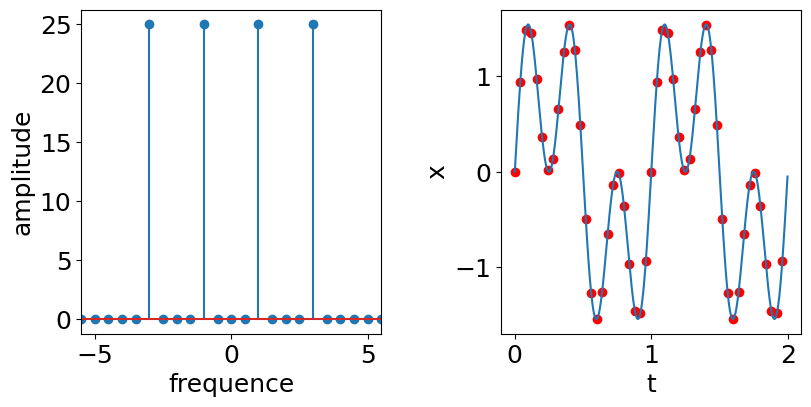

In [5]:
from utils import dft_analysis

"""
func: dft_analysis(f, T, N)

    Perform DFT analysis on a given function f with a total time of T and N samples.

    Args:
        f (function): The function to be analyzed.
        T (float): The total time of the signal.
        N (int): The number of samples.

    Returns:
        None
"""


def f(t): 
    return np.sin(2*np.pi*t) + np.sin(6*np.pi*t)


print('sample size=50: ')
dft_analysis(f=f, T=2, N=50)



#   The storage path of the output file.

The storage path is mainly based on the current time.

In [6]:
from utils import create_save_dir

"""
func: create_save_dir(path_ini)
    
    Create a new directory with the current date and time as its name and return the path of the new directory.

    Args:
    path_ini: The initial path to create the new directory.

    Return:
    The path of the new directory.
"""

args.path = create_save_dir(args.ini_path)
print('save path: %s' % (args.path))


save path: 20240326113916429670


# Generation of training and test sets.

Target function: $f(x)= \alpha \left[(sin(x)+2sin(3x)+3sin(5x))/\alpha \right]$, where $\left[ \cdot \right]$ is the rounding function.

Training data interval: $[-10, 10]$

Test data interval: $[-10.5, 10.5]$


The training data size:  torch.Size([600, 1])
The target function:


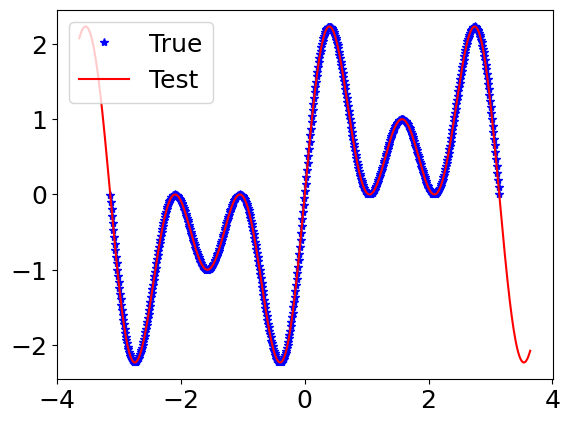

In [7]:

from utils import get_dataset, plot_target

"""
func: get_dataset(args, target_func)
    
    Create the 1d dataset with the data boundary and the target function.

    Args:
    args (object): object containing data boundary.

    Return:
    The tuple of training input, training target, test input, test target.
"""

def get_y(x):  

    """
    Function to fit.

    Args:
        x (float): input value.

    Returns:
        float: output value.
    """
    alpha=1
    y = np.sin(x)+np.sin(3*x)+np.sin(5*x)
    # y=alpha*np.round(np.sin(x)/alpha)
    return y


args.training_input, args.training_target, args.test_input, args.test_target = get_dataset(args, get_y)

print("The training data size: ", args.training_input.shape)


print("The target function:")
plot_target(args)



# Activation Functions

We mainly give four activation functions: Tanh, ReLU, Sigmoid, Hat.

Tanh function：

$$f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

ReLU function：

$$f(x) = \max(0, x)$$

Sigmoid function：

$$f(x) = \frac{1}{1 + e^{-x}}$$

Hat function：

$$f(x) = \begin{cases} x, & 0 \leq x < 1 \\  2 - x, & 1 \leq x < 2 \\ 0, & \text{otherwise}  \end{cases}$$



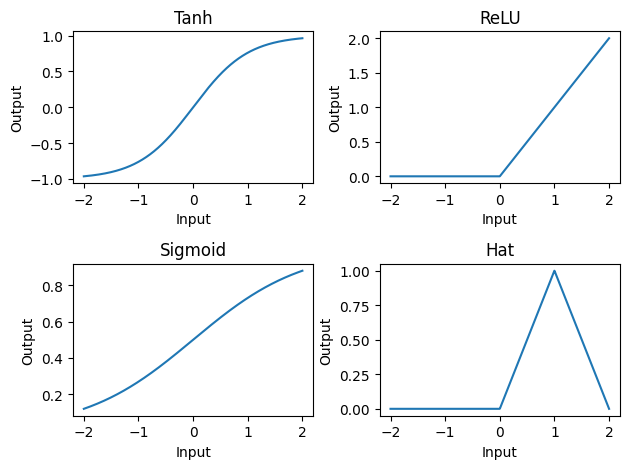

In [8]:

from utils import plot_activation

plot_activation()



# Network model and parameter initialization.

Given $\theta\in \mathbb{R}^M$, the FNN function $f_{\theta}(\cdot)$ is defined recursively. First, we denote $f^{[0]}_{\theta}(x)=x$ for all $x\in\mathbb{R}^d$. Then, for $l\in[L-1]$, $f^{[l]}_{\theta}$ is defined recursively as 
$f^{[l]}_{\theta}(x)=\sigma (W^{[l]} f^{[l-1]}_{\theta}(x)+b^{[l]})$, where $\sigma$ is a non-linear activation function.
Finally, we denote
\begin{equation*}
    f_{\theta}(x)=f(x,\theta)=f^{[L]}_{\theta}(x)=W^{[L]} f^{[L-1]}_{\theta}(x)+b^{[L]}.
\end{equation*}

The parameter initialization is under the Gaussian distribution as follows,

\begin{equation*}
    \theta|_{l} \sim N(0, \frac{1}{m_{l}^t}),
\end{equation*}
where the $l$ th layer parameters of $\theta$ is the ordered pair $\theta|_{l}=\Big(W^{[l]},b^{[l]}\Big),\quad l\in[L]$, $m_{l}$ is the width of the $l$ th layer.

In [9]:
from utils import get_act_func, Model_asi

#Set the activation function
print("The activation function: ", args.act_func_name)
act_func = get_act_func(args.act_func_name)

#Initialize the neural network model
model = Model_asi(args.t, args.hidden_layers_width, args.input_dim,
               args.output_dim, act_func).to(args.device)
print("The network structure:")
print(model)


The activation function:  sin_10
The network structure:
Model_asi(
  (act_layer): sin_10_torch()
  (net1): Sequential(
    (0): Linear(in_features=1, out_features=200, bias=True)
    (1): sin_10_torch()
    (2): Linear(in_features=200, out_features=200, bias=True)
    (3): sin_10_torch()
    (4): Linear(in_features=200, out_features=200, bias=True)
    (5): sin_10_torch()
    (6): Linear(in_features=200, out_features=100, bias=True)
    (7): sin_10_torch()
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
  (net2): Sequential(
    (0): Linear(in_features=1, out_features=200, bias=True)
    (1): sin_10_torch()
    (2): Linear(in_features=200, out_features=200, bias=True)
    (3): sin_10_torch()
    (4): Linear(in_features=200, out_features=200, bias=True)
    (5): sin_10_torch()
    (6): Linear(in_features=200, out_features=100, bias=True)
    (7): sin_10_torch()
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)


# One-step training function.

The training data set is denoted as  $S=\{(x_i,y_i)\}_{i=1}^n$, where $x_i\in\mathbb{R}^d$ and $y_i\in \mathbb{R}^{d'}$. For simplicity, we assume an unknown function $y$ satisfying $y(x_i)=y_i$ for $i\in[n]$. The empirical risk reads as
\begin{equation*}
    R_S(\theta)=\frac{1}{n}\sum_{i=1}^n\ell(f(x_i,\theta),y(x_i)),
\end{equation*}
where the loss function $\ell(\cdot,\cdot)$ is differentiable and the derivative of $\ell$ with respect to its first argument is denoted by $\nabla\ell(y,y^*)$. 

For a one-step gradient descent, we have, 

\begin{equation*}
    \theta_{t+1}=\theta_t-\eta\nabla R_S(\theta).
\end{equation*}



In [10]:

from utils import train_one_step


"""
func: train_one_step(model, optimizer, loss_fn,  args)
    Train one step.

    Args:
        model (nn.Module): model.
        optimizer (optim.Optimizer): optimizer.
        loss_fn (nn.Module): loss function.
        args (object): object containing training and test input and target.

    Returns:
        tuple: tuple containing loss and outputs.
"""


'\nfunc: train_one_step(model, optimizer, loss_fn,  args)\n    Train one step.\n\n    Args:\n        model (nn.Module): model.\n        optimizer (optim.Optimizer): optimizer.\n        loss_fn (nn.Module): loss function.\n        args (object): object containing training and test input and target.\n\n    Returns:\n        tuple: tuple containing loss and outputs.\n'

# One-step test function.

In [11]:

from utils import test


"""
func: test(model, loss_fn, args)
    Test.

    Args:
        model (nn.Module): model.
        loss_fn (nn.Module): loss function.
        args (object): object containing training and test input and target.

    Returns:
        tuple: tuple containing loss and outputs.
"""


'\nfunc: test(model, loss_fn, args)\n    Test.\n\n    Args:\n        model (nn.Module): model.\n        loss_fn (nn.Module): loss function.\n        args (object): object containing training and test input and target.\n\n    Returns:\n        tuple: tuple containing loss and outputs.\n'

# Plot the loss value.

In [12]:

from utils import plot_loss


"""
func: plot_loss(path, loss_train, x_log=False)
    Plot loss.

    Args:
        path (str): path.
        loss_train (list): list of training loss.
        x_log (bool): whether to use log scale for x-axis.

    Returns:
        None.
"""


'\nfunc: plot_loss(path, loss_train, x_log=False)\n    Plot loss.\n\n    Args:\n        path (str): path.\n        loss_train (list): list of training loss.\n        x_log (bool): whether to use log scale for x-axis.\n\n    Returns:\n        None.\n'

# Plot the output figure.



In [13]:

from utils import plot_model_output


"""
func: plot_model_output(path, args, output, epoch)
    Plot model output.

    Args:
        path (str): path.
        args (object): object containing training and test input and target.
        output (torch.tensor): model output.
        epoch (int): epoch.
    Returns:
        None.
"""

'\nfunc: plot_model_output(path, args, output, epoch)\n    Plot model output.\n\n    Args:\n        path (str): path.\n        args (object): object containing training and test input and target.\n        output (torch.tensor): model output.\n        epoch (int): epoch.\n    Returns:\n        None.\n'

# Training Process

In [14]:
# Define the optimizer: determine the gradient descent optimization algorithm, the default is Adam.
if args.optimizer=='sgd':
    optimizer = torch.optim.SGD(model.parameters(), lr=args.lr)
else:
    optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)

# Define the loss function: the loss function is the mean square error.
loss_fn = nn.MSELoss(reduction='mean')

# Record the start time of training
t0 = time.time()

# Initialize the loss list
args.loss_training_lst=[]
args.loss_test_lst = []

# Initialize the training output list
args.training_output=[]

# Start training
for epoch in range(args.epochs+1):
    # Set the model to training mode
    model.train()

    # Train one step
    loss, training_output = train_one_step(
    model, optimizer, loss_fn, args)

    # Test the trained model
    loss_test, output = test(
        model, loss_fn, args)
    
    # Record the loss and output
    args.loss_training_lst.append(loss)
    args.loss_test_lst.append(loss_test)
    args.training_output.append(training_output.detach().cpu().numpy())

    # Print the loss and time
    if epoch % args.plot_epoch == 0:
        print("[%d] loss: %.6f valloss: %.6f time: %.2f s" %
                (epoch + 1, loss, loss_test, (time.time()-t0)))

    # Plot the loss and output
    if (epoch+1) % (args.plot_epoch) == 0:
        plot_loss(path=args.path,
                loss_train=args.loss_training_lst, x_log=True)
        plot_loss(path=args.path,
                loss_train=args.loss_training_lst, x_log=False)

        plot_model_output(args.path, args, output, epoch)




[1] loss: 1.497544 valloss: 1.317929 time: 0.06 s
[1001] loss: 0.000412 valloss: 0.757886 time: 33.27 s


# Plot the frequency distribution figure

To avoid the interference of amplitude on the experiment, we study the changes in relative error at different frequencies. We consider the following quantities:
$$
\Delta_F(k)=\frac{\left|\hat{h}_k-\hat{f}_k\right|} {\left|\hat{f}_k\right|}
$$

where $\hat{h}_k$ and $\hat{f}_k$ are the discrete Fourier transform (DFT) of the DNN output $h(x)$ and the  target function $f(x)$,  $|·|$ denotes the norm of a complex number.

In [15]:



def plot_freq_distr(args, y_fft, y_fft_pred, idx):


    """
    Plot frequency distribution of the given training target and output.
    
    Args:
    args: A dictionary containing save path.
    y_fft: The FFT of the target.
    y_fft_pred: The FFT of the model output.
    idx: The selected index array.

    Returns:
    None
    """
    # initialize the figure
    plt.figure()
    ax = plt.gca()

    # plot the fft of the target using semilogy
    plt.semilogy(y_fft+1e-5, label='Target')
    plt.semilogy(idx, y_fft[idx]+1e-5, 'o')

    # plot the fft of the model output using semilogy
    plt.semilogy(y_fft_pred+1e-5, label='Model output')
    plt.semilogy(idx, y_fft_pred[idx]+1e-5, 'o')

    # set the labels
    plt.legend(fontsize=22)

    # set the x-axis and y-axis labels and their fontsizes
    plt.xlabel('freq idx', fontsize=22)
    plt.ylabel('freq', fontsize=22)

    # set the x-axis and y-axis tick parameters size
    plt.gca().tick_params(axis='y', labelsize=22)
    plt.gca().tick_params(axis='x', labelsize=22)


    plt.tight_layout()

    # save the figure
    plt.savefig(os.path.join(args.path, 'fft.png'), dpi=300)
    plt.show()
    plt.close()


def plot_abs_err(args, abs_err):

    """
    Plot the heatmap of the relative error for different frequencies.
    
    Args:
    args: A dictionary containing save path.
    abs_err: The absolute error array.
    
    Returns:
    None
    """

    # initialize the figure
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    # plot the heatmap of the relative error
    plt.pcolor(abs_err, cmap='RdBu', vmin=0.1, vmax=1, linewidths=0.4)

    # set the colorbar
    plt.colorbar()
   
    # set the x-axis labels and its fontsize
    plt.xlabel('Epoch', fontsize=22)

    # Set the y-axis ticks and labels to 1, 2, 3
    plt.yticks([0.5, 1.5, 2.5], [1, 2, 3], fontsize=22)

    # Set the y-axis tick parameters to hide the tick marks and set the tick label size
    plt.gca().yaxis.set_tick_params(size=0)
    plt.gca().tick_params(axis='y', labelsize=22)
    plt.gca().tick_params(axis='x', labelsize=22)
    plt.title('Absolute Error', fontsize=22)
    plt.tight_layout()

    # save the figure
    plt.savefig(os.path.join(args.path, 'hot.png'))
    plt.show()
    plt.close()

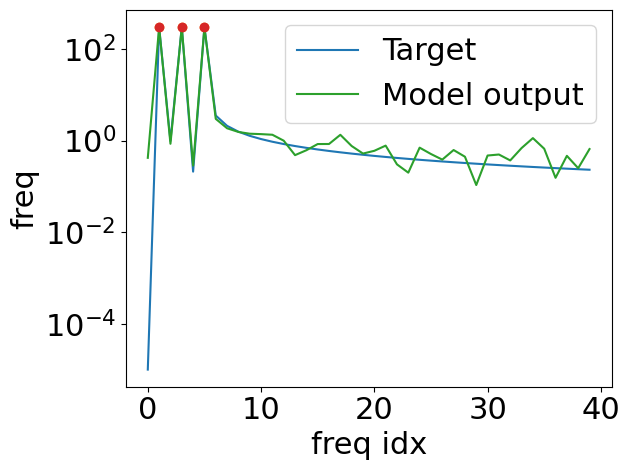

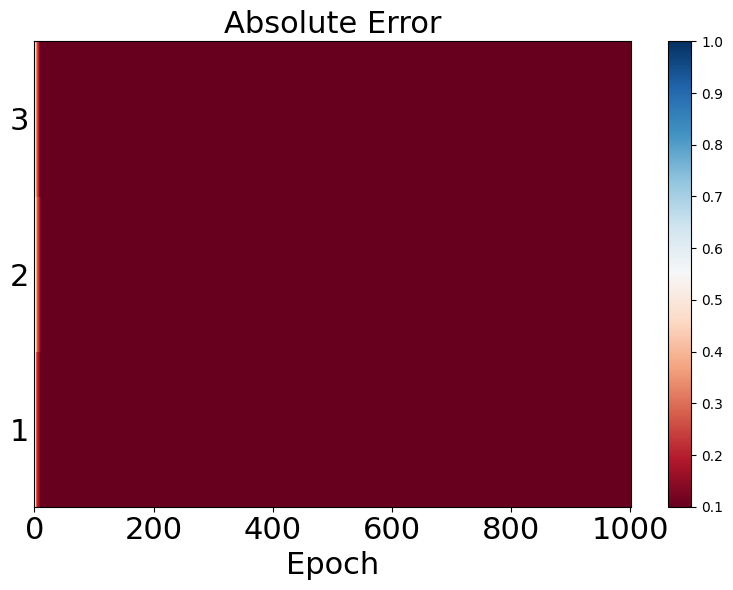

In [16]:
# calculate the FFT of the target
y_fft = my_fft(args.training_target.detach().cpu().numpy()) 

# select the peak index
idx = SelectPeakIndex(y_fft, endpoint=False)

# calculate the FFT of the model output
y_fft_pred = my_fft(args.training_output[-1])

# squeeze the training output
y_pred_epoch = np.squeeze(args.training_output)

# select the first three peak index
idx1 = idx[:3]

# create the absolute error array
abs_err = np.zeros([len(idx1), len(args.training_output)])

# calculate the absolute error
tmp1 = y_fft[idx1]
for i in range(len(y_pred_epoch)):
    tmp2 = my_fft(y_pred_epoch[i])[idx1]
    abs_err[:, i] = np.abs(tmp1 - tmp2)/(1e-5 + tmp1)

    

plot_freq_distr(args, y_fft, y_fft_pred, idx)
plot_abs_err(args, abs_err)

# Task

The fitting process of neural networks is still affected by many factors, such as: parameter initialization distribution, learning rate, objective function, activation function, etc. Will the change of these factors affect the frequency principle? Try to study the impact of certain parameters on the frequency principle by controlling variables.

Next, we provide two experimental schemes for changing the target function. They respectively explore the impact of changes in the target function on the frequency principle by changing the frequency and amplitude of the high-frequency part in the target function. (code shown in example.ipynb) 

    Eg1. Study how different frequency amplitudes affect the convergence speed of the model. Taking the objective function $sin(x)+a*sin(4x)$ as an example, where $a$ is a given parameter. We can plot the horizontal axis as $a$ and the vertical axis as (the number of steps required for high-frequency relative error <10%) / (the number of steps required for low-frequency relative error <10%) under this objective function.

    Eg2. Study how different high frequency affect the convergence speed of the model. Taking the objective function $sin(x)+0.2*sin(k\cdot x)$ as an example, where $k$ is a given parameter. We can plot the horizontal axis as $k$ and the vertical axis as (the number of steps required for high-frequency relative error <10%) / (the number of steps required for low-frequency relative error <10%) under this objective function.


    (10% in the two tasks above is optional.)

In [17]:
import matplotlib.pyplot as plt
import numpy as np


def format_settings(
        wspace=0.25, 
        hspace=0.4, 
        left=0.12, 
        right=0.9, 
        bottom=0.15, 
        top=0.95,
        fs=12,
        show_dpi=80,
        save_dpi=300,
        lw=1.5,
        ms=5,
        axlw=1.5,
        major_tick_len=5,
        major_tick_width=1.5,
        major_tick_pad=5,
        minor_tick_len=0,
        minor_tick_width=0,
        minor_tick_pad=5,
        ):
    '''
        使用方法：
            fig = plt.figure(figsize=(12, 4), dpi=300)
            format_settings()
            grid = plt.GridSpec(2, 2)
            ax1 = fig.add_subplot(grid[0, 0]) # 左上角图
            ax2 = fig.add_subplot(grid[0, 1]) # 右上角图
            ax3 = fig.add_subplot(grid[:, 0]) # 底部空间合并一张图
        注意：
            以上文字和坐标轴粗细适用于figsize长度为12的情形，宽度可调。
            若要调整figsize长度，需要相应调整以上文字和坐标轴粗细。
    '''
    # 设置子图线宽
    plt.rcParams['lines.linewidth'] = lw
    
    # 子图点大小
    plt.rcParams['lines.markersize'] = ms
    
    # 子图间距与位置  w:左右 h:上下
    plt.subplots_adjust(wspace=wspace, hspace=hspace, left=left, right=right, bottom=bottom, top=top)

    # 字体大小
    plt.rcParams['font.size'] = fs
    plt.rcParams['axes.labelsize'] = fs
    plt.rcParams['axes.titlesize'] = fs
    plt.rcParams['xtick.labelsize'] =fs
    plt.rcParams['ytick.labelsize'] = fs
    plt.rcParams['legend.fontsize'] = fs
    # 子图坐标轴宽度
    plt.rcParams['axes.linewidth'] = axlw
    # 子图坐标轴可见性
    plt.rcParams['axes.spines.top'] = True
    plt.rcParams['axes.spines.right'] = True
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.bottom'] = True

    # 子图坐标轴刻度宽度
    plt.rcParams['xtick.major.width'] = major_tick_width
    plt.rcParams['ytick.major.width'] = major_tick_width
    plt.rcParams['xtick.minor.width'] = minor_tick_width
    plt.rcParams['ytick.minor.width'] = minor_tick_width
    # 子图坐标轴刻度长度
    plt.rcParams['xtick.major.size'] = major_tick_len
    plt.rcParams['ytick.major.size'] = major_tick_len
    plt.rcParams['xtick.minor.size'] = minor_tick_len
    plt.rcParams['ytick.minor.size'] = minor_tick_len
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.major.pad'] = major_tick_pad
    plt.rcParams['ytick.major.pad'] = major_tick_pad
    plt.rcParams['xtick.minor.pad'] = minor_tick_pad
    plt.rcParams['ytick.minor.pad'] = minor_tick_pad
    
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.top'] = False 
    plt.rcParams['ytick.right'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['legend.frameon'] = False
    # 子图坐标轴刻度标签位置
    plt.rcParams['figure.dpi'] = show_dpi
    # 子图坐标轴刻度标签位置
    plt.rcParams['savefig.dpi'] = save_dpi


In [18]:
abs_err.shape

(3, 1001)

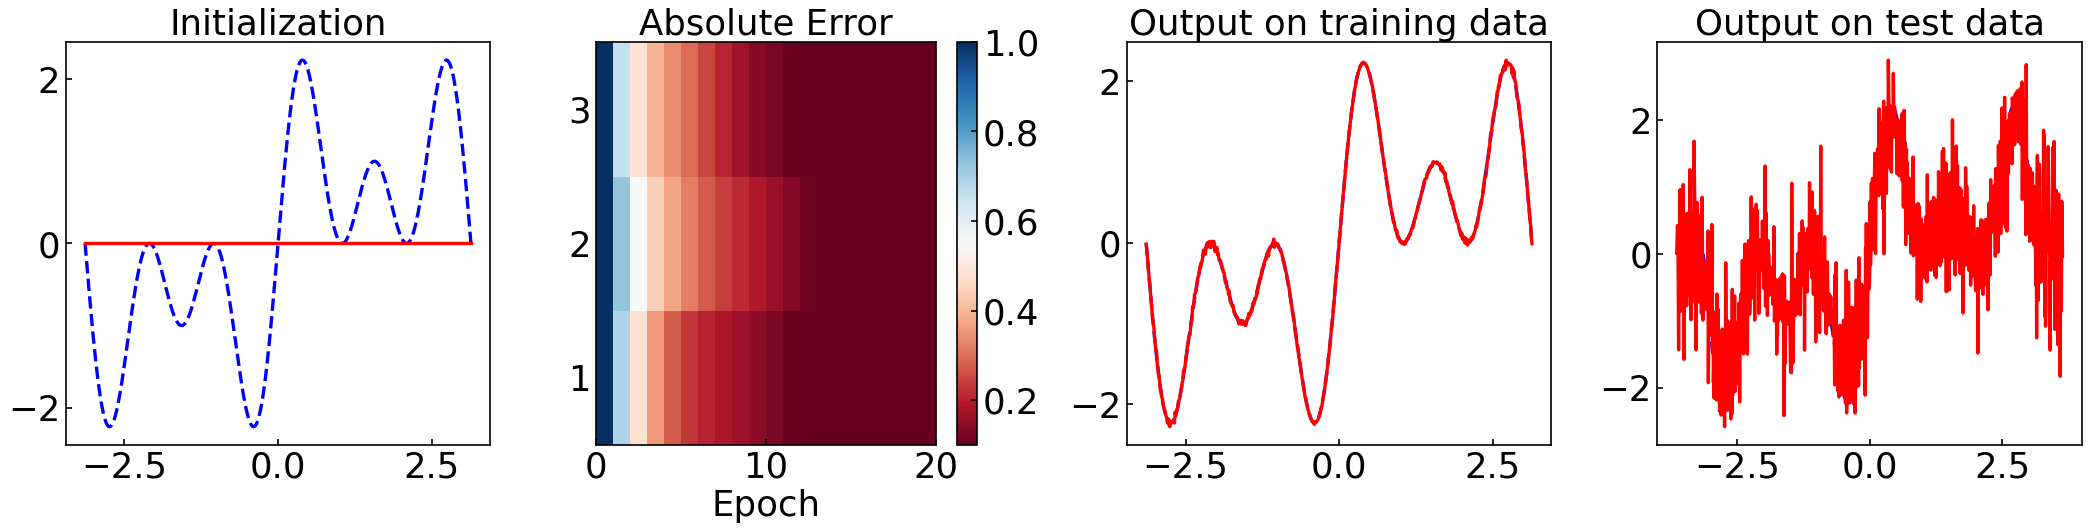

In [21]:
import matplotlib.lines as lines
fig=plt.figure(figsize=(28,7))
format_settings(left=0.05, right=0.95, bottom=0.18,top=0.9,fs=32
        )
# for ind, i in enumerate([0,999,2999,9999]):
plt.subplot(1, 4, 1)
ax=plt.gca()

plt.plot(args.training_input.detach().cpu().numpy(),
    args.training_target.detach().cpu().numpy(),'b--', label='Target point', lw=3)
plt.plot(args.training_input.detach().cpu().numpy(),
    y_pred_epoch[0], 'r-', label='Test data', lw=3)

plt.title('Initialization')
plt.yticks([-2, 0, 2])
# ax.tick_params(labelsize=18)
# plt.ylim(-1.2, 1.2)
# plt.legend(fontsize=18)
# if ind==0:
#     plt.title('Epoch=0')
# else:
#     plt.title('Epoch=%d' % (i+1))
#     # plt.title('Original Image', fontsize=15)
#     # plt.imshow(image_target, cmap='gray')

plt.subplot(1, 4, 2)
ax = plt.gca()

# plot the heatmap of the relative error
plt.pcolor(abs_err[:,:20], cmap='RdBu', vmin=0.1, vmax=1, linewidths=0.4)

# set the colorbar
plt.colorbar()

# set the x-axis labels and its fontsize
plt.xlabel('Epoch')

# Set the y-axis ticks and labels to 1, 2, 3
plt.yticks([0.5, 1.5, 2.5], [1, 2, 3])

# Set the y-axis tick parameters to hide the tick marks and set the tick label size
plt.gca().yaxis.set_tick_params(size=0)
# plt.gca().tick_params(axis='y')
# plt.gca().tick_params(axis='x')
plt.title('Absolute Error')

plt.subplot(1, 4, 3)
ax=plt.gca()

plt.plot(args.training_input.detach().cpu().numpy(),
    args.training_target.detach().cpu().numpy(),'b--', label='Target point', lw=3)
plt.plot(args.training_input.detach().cpu().numpy(),
    y_pred_epoch[-1], 'r-', label='Test data', lw=3)

plt.title('Output on training data')
plt.yticks([-2, 0, 2])

plt.subplot(1, 4, 4)
ax=plt.gca()

plt.plot(args.training_input.detach().cpu().numpy(),
    args.training_target.detach().cpu().numpy(),'b--', label='Target point', lw=3)
plt.plot(args.test_input.detach().cpu().numpy(),
    output.detach().cpu().numpy(), 'r-', label='Test data', lw=3)

plt.title('Output on test data')
plt.yticks([-2, 0, 2])
# line1 = lines.Line2D([0], [0], c='b', marker='*', label=r'initialization')
# line2 = lines.Line2D(
#     [0], [0], c='r', label='Test')
# line3 = lines.Line2D(
#     [0], [0], label=r'$\eta=5\times 10^{-2}$', linestyle='-',  lw=10, c='C1')

# line3 = lines.Line2D([0], [0], label='p=1', linestyle='-', lw=10, c='black')

# handles = [line1,line2]
# fig.legend(handles=handles, loc="lower center",  ncol=2, fontsize=18, )
# fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.03), ncol=2)
# plt.axis('off')
# plt.tight_layout()
# plt.subplot(1, 4, 2)
# plt.title('Epoch=10000', fontsize=15)
# plt.imshow(predicted1, cmap='gray')
# plt.axis('off')
# plt.subplot(1, 4, 3)
# plt.title('Epoch=100000', fontsize=15)
# plt.imshow(predicted2, cmap='gray')
# plt.axis('off')
# plt.subplot(1, 4, 4)
# plt.title('Epoch=1000000', fontsize=15)
# plt.imshow(predicted3, cmap='gray')
# plt.axis('off')

plt.savefig('/root/zhangzhongwang/book24/fprinciple/chap2/fig:sin10_gene/sin10/ricker_a0point1.png', dpi=300)
# plt.show()

    

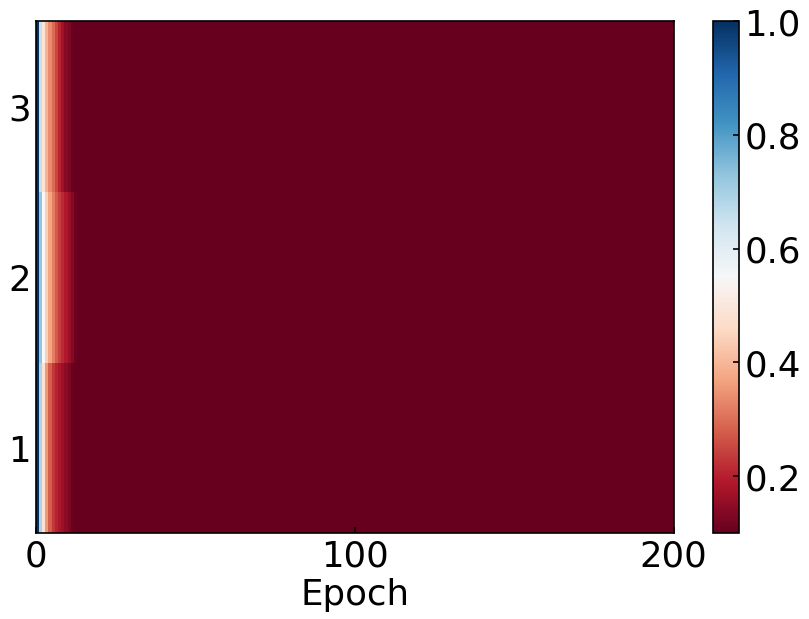

In [20]:
fig=plt.figure(figsize=(12,8))
format_settings(left=0.12, right=0.95, bottom=0.15,top=0.95,fs=32
        )



ax = plt.gca()

# plot the heatmap of the relative error
plt.pcolor(abs_err[:,:200], cmap='RdBu', vmin=0.1, vmax=1, linewidths=0.4)

# set the colorbar
plt.colorbar()

# set the x-axis labels and its fontsize
plt.xlabel('Epoch')

# Set the y-axis ticks and labels to 1, 2, 3
plt.yticks([0.5, 1.5, 2.5], [1, 2, 3])
plt.xticks([0,100,200])

# Set the y-axis tick parameters to hide the tick marks and set the tick label size
plt.gca().yaxis.set_tick_params(size=0)
# plt.gca().tick_params(axis='y')
# plt.gca().tick_params(axis='x')
plt.savefig('ricker_heat_01.png',dpi=300)